# Code suggestions for "Main EEG Notebook"

First, start with a serious markdown block explaining this is an exploration of data from...and explain how file directories are set-up. This will wait until we get things set up on surf, then everyone should just use the same directory. I will show finding files recursively to get away fom the confusion.

Importing libraries (was fine) but just go with convention, and rename numpy and pandas

In [1]:
import mne      # toolbox for analyzing and visualizing EEG data
import os       # using operating system dependent functionality (folders)
import pandas as pd  # data analysis and manipulation

import numpy as np # numerical computing (manipulating and performing operations on arrays of data)
import copy     # Can Copy and Deepcopy files so original file is untouched.
import glob

from IPython.display import clear_output
import warnings

C:\Users\makeda\anaconda3\envs\mne-march2\lib\site-packages\mne\fixes.py:321: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(scipy.__version__) >= '1.1':
C:\Users\makeda\anaconda3\envs\mne-march2\lib\site-packages\mne\fixes.py:1134: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(numba.__version__) < LooseVersion('0.40'):
C:\Users\makeda\anaconda3\envs\mne-march2\lib\site-packages\mne\fixes.py:1134: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(numba.__version__) < LooseVersion('0.40'):


Now try to use pep-8 conventions somewhat (https://peps.python.org/pep-0008/) so it's more readable

In [2]:
# variables for paths
path_metadata = "C:/Projects/new_data_karin_EEG/metadata/"



Please check the below that this is what you have put in the metadata folder. Is there something I am missing

In [3]:
os.listdir(path_metadata)

['cdi.txt', 'children.txt', 'CODES_overview.txt', 'parents.txt']

In [4]:
cdi_overview_csv = pd.read_csv(os.path.join(
    path_metadata, 'cdi.txt'), delimiter='\t')
children_overview_csv = pd.read_csv(os.path.join(
    path_metadata, 'children.txt'), delimiter='\t')
codes_overview_csv = pd.read_csv(os.path.join(
    path_metadata, 'CODES_overview.txt'), delimiter='\t')

In [5]:
codes_overview_csv

,condition,stimulusType,nrOfToken,nrInPresentationScript,codeInPresentationLog,tiersInPraat_original,markerInPraat_original,tiersInPraat_new,markerInPraat_new
0,giepMultiple,standard1,1,1,std:1,1,1,1,1
1,giepMultiple,standard1,2,2,std:2,2,2,1,1
2,giepMultiple,standard1,3,3,std:3,12,3,1,1
3,giepMultiple,standard1,4,4,std:4,3,4,1,1
4,giepMultiple,standard1,5,5,std:5,13,5,1,1
...,...,...,...,...,...,...,...,...,...
73,gopMultiple,deviant,11,71,dev:11,1237,71,23,6
74,gopMultiple,deviant,12,72,dev:12,47,72,23,6
75,gopSingle,standard1,1,104,std:1,467,104,467,104
76,gopSingle,standard2,2,105,std:1,1467,105,1467,105


So as you see above no need to flip around .xlsx files just to get this formatted, .csv is a bit more universal, and can be opened by people who use Excel

In [6]:
path_excel_files = "C:/Projects/new_data_karin_EEG/excel"
MakeExcelFiles = True  # Option to put .txt files into Excel files

Unless someone tells you they need .xlsx files specifically, I suggest you avoid them, because they are more difficult to deal with from a code side

OK, so to be super-picky for you learning the way you wrote LoadMetaData implies it is a class, not a function...again see pep-8...moving on....

## loading EEG files

In [7]:
eeg_list = []
EEG_filenames = []
EEG_filelocation = []

EEG_file_root = "C:/Projects/new_data_karin_EEG/not_zip/"

pattern = os.path.join(EEG_file_root, '**/*.bdf')

files = glob.glob(pattern, recursive=True)

for file in files:
    if file.endswith('.bdf'):  # and len(file) == 8:
        BdfFile = mne.io.read_raw_bdf(file)
        eeg_list.append(BdfFile)
        EEG_filenames.append(file.replace(".bdf", ""))
        EEG_filelocation.append(file)
        clear_output(wait=True)
print(len(eeg_list), "EEG files loaded")

99 EEG files loaded


Here add a commment block to explain you are just showing what an example EEG file contains, and by changing the index you can examine different files. In fact you can make it interactive 

In [8]:
index = input("The in the index (should be a whole number) of the file you want to see:  " )
# note you must press enter after input, or the notebook willl get stuck

The in the index (should be a whole number) of the file you want to see:  8


In [9]:
index = int(index)
show_eeg_info = True
if(show_eeg_info):
    print('File Location: ', EEG_filelocation[index], '\n')
    print(eeg_list[index], '\n')
    print(eeg_list[index].info)

File Location:  C:/Projects/new_data_karin_EEG/not_zip\101to110\101to110\105\105a\105a.bdf 

<RawEDF | 105a.bdf, 41 x 4282368 (2091.0 s), ~81 kB, data not loaded> 

<Info | 7 non-empty values
 bads: []
 ch_names: Fp1, AF3, F7, F3, FC1, FC5, T7, C3, CP1, CP5, P7, P3, Pz, PO3, ...
 chs: 40 EEG, 1 STIM
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 417.0 Hz
 meas_date: 2021-04-07 09:33:56 UTC
 nchan: 41
 projs: []
 sfreq: 2048.0 Hz
>


In [10]:
## SAVE Event Markers to external .txt files: ( if desired uncomment this block )
# for i in range(len(EEG)):
#     numpy.savetxt(EEG_filenames[i] + ".txt", mne.find_events(EEG[i]), fmt = '%i')
#     clear_output(wait=True)

In [13]:
# LOAD Event Markers:
Events = []
Events_12 = []
for i in range(len(eeg_list)):
    Events.append(np.loadtxt(EEG_filenames[i] + ".txt", dtype=int))
print(len(Events), "Event Marker files loaded")

show_event_info = True
participantIndex = 5
eventIndex = 500
if(show_event_info):
    event_time = Events[participantIndex][eventIndex][0]
    event_ID = Events[participantIndex][eventIndex][2]
    print("\nParticipant", participantIndex, "heard event ID:", event_ID,
          "after", event_time/eeg_list[participantIndex].info['sfreq'], 'seconds',
          'as the ' + str(eventIndex) + "'th event")
    print("\nEvent ID:", event_ID, "\nCondition:", codes_overview_csv["condition"][event_ID], "\nStimulus Type:",
          codes_overview_csv["stimulusType"][event_ID], "\nToken nr:",  codes_overview_csv["nrOfToken"][event_ID], "\n")

99 Event Marker files loaded

Participant 5 heard event ID: 17 after 388.5009765625 seconds as the 500'th event

Event ID: 17 
Condition: giepMultiple 
Stimulus Type: standard2 
Token nr: 6 



## Event marker visualization

In [21]:
# plt_1 = plt.figure(figsize=(1, 6))
# M = Multiple / S = Single / T = Tokens            F = First / S = Standard / D = Deviant
Dictionary = {'GiepMT_FS': 1, 'GiepMT_S': 2, 'GiepMT_D': 3, 'GiepST_FS': 4, 'GiepST_S': 5, 'GiepST_D': 6,
              'GopMT_FS': 7, 'GopMT_S': 8, 'GopMT_D': 9, 'GopST_FS': 10, 'GopST_S': 11, 'GopST_D': 12}
EventConversion_12 = [[1, 12, 1], [13, 24, 2], [25, 36, 3], [101, 101, 4], [102, 102, 5], [103, 103, 6],
                      [37, 48, 7], [49, 60, 8], [61, 72, 9], [104, 104, 10], [105, 105, 11], [106, 106, 12]]

Events_12 = copy.deepcopy(Events)
for i in range(len(eeg_list)):
    for minOld, maxOld, newValue in EventConversion_12:
        Events_12[i] = np.where(np.logical_and(
            minOld <= Events_12[i], Events_12[i] <= maxOld), newValue, Events_12[i])

colorDict = {1: "#8b0000", 2: "#008000", 3: "#000080", 4: "#ff0000", 5: "#ff1493", 6: "#911eb4",
             7: "#87cefa", 8: "#ffd700", 9: "#696969", 10: "#000000", 11: "#1e90ff", 12: "#7fff00"}
%matplotlib qt
fig = mne.viz.plot_events(Events_12[4], event_id=Dictionary, color=colorDict)

In [15]:
# note - should go to pop-out window for zooming

now again we can look interactively

In [23]:
index = input("The in the index (should be a whole number) of the file you want to see:  " )
# note you must press enter after input, or the notebook willl get stuck

The in the index (should be a whole number) of the file you want to see:  10


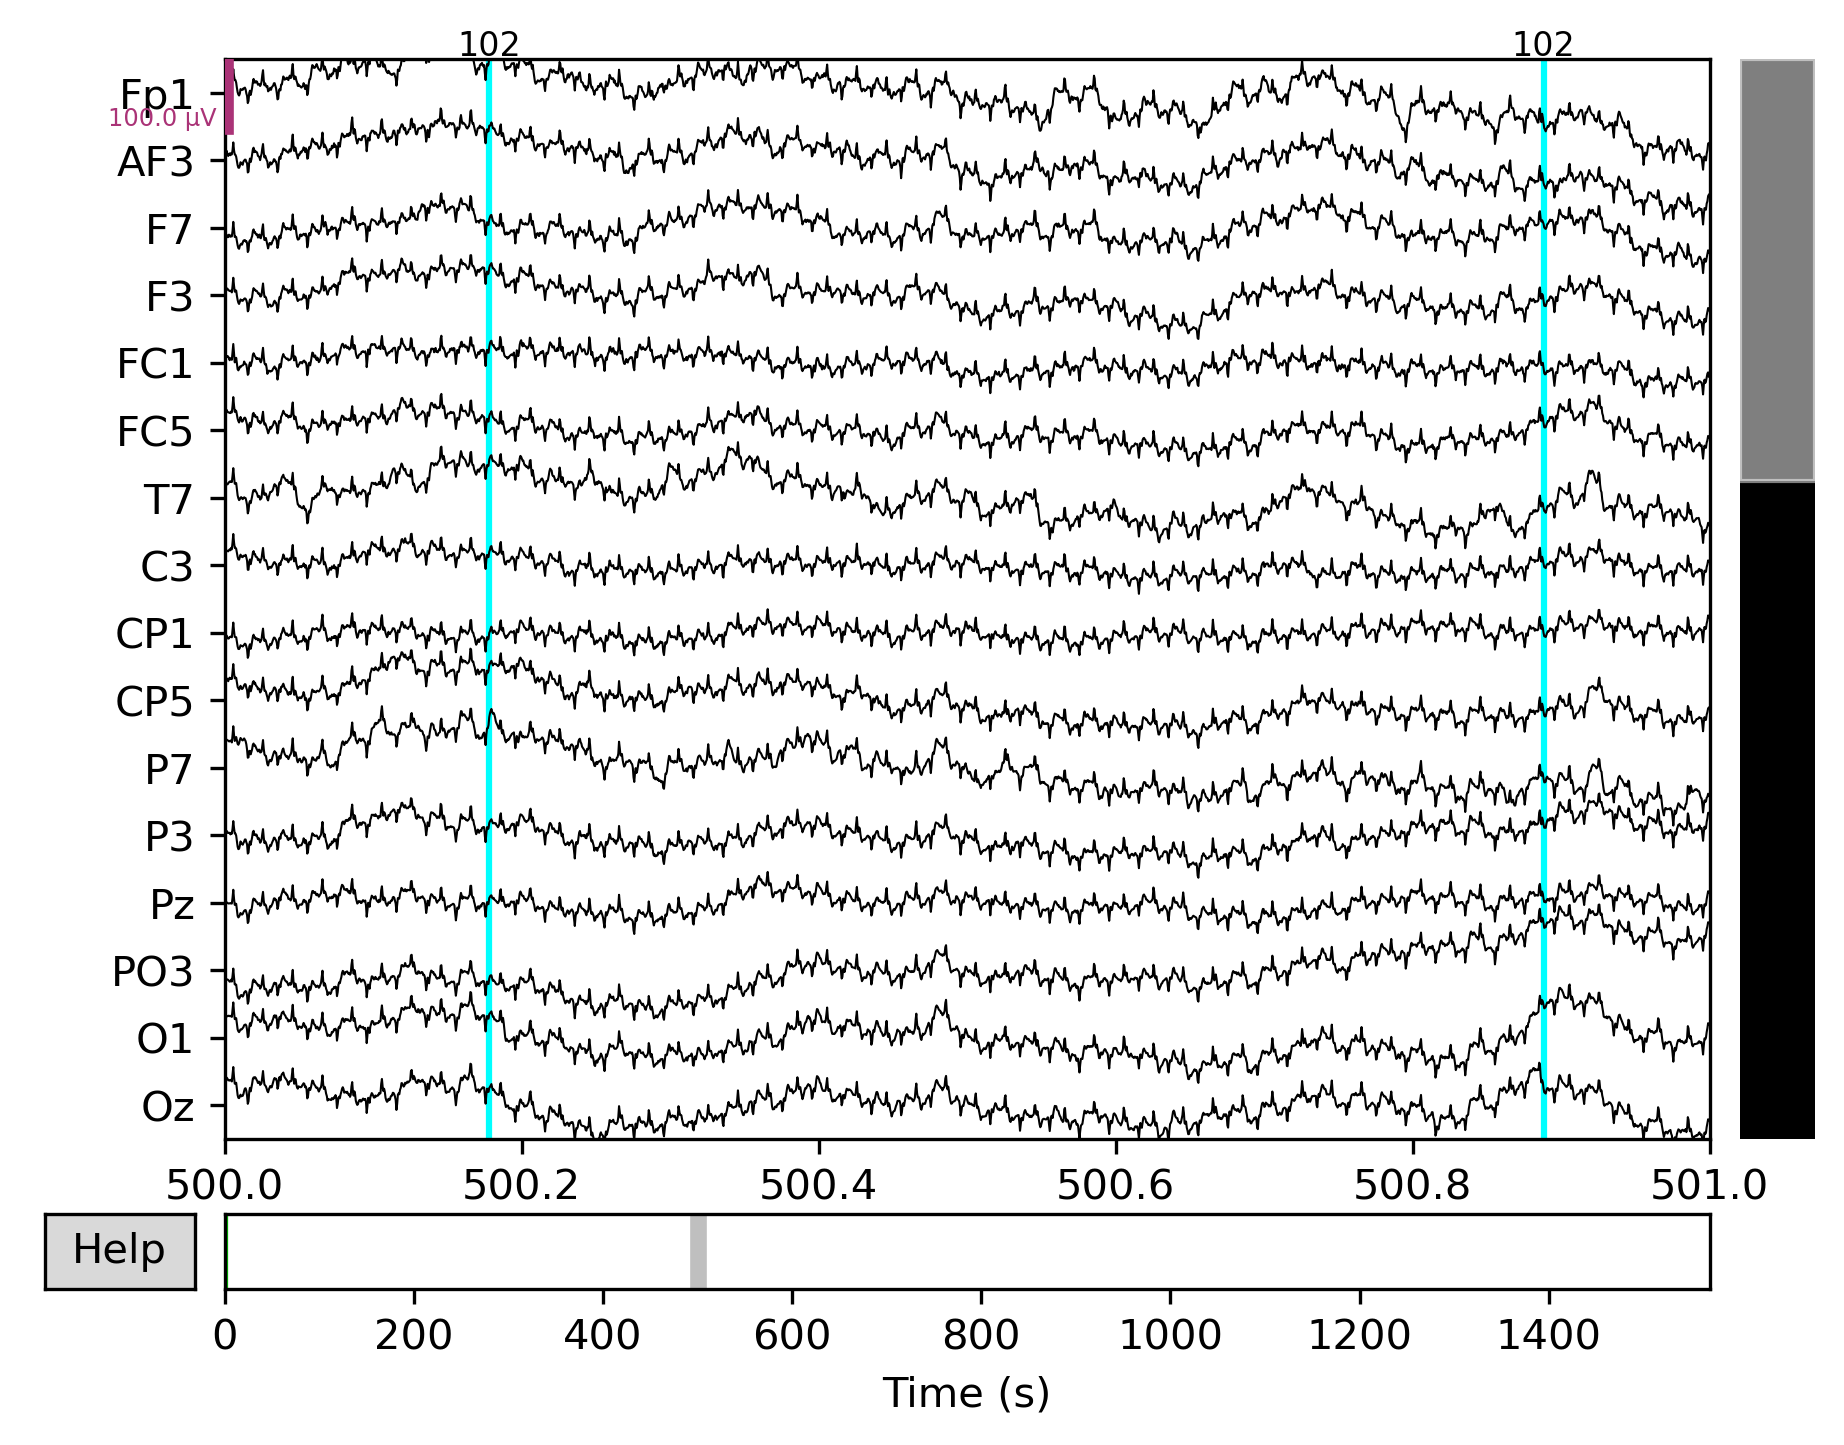

In [24]:
# note the interactive version of plot is a pop-up window
index = int(index)
%matplotlib qt 
mne.viz.plot_raw(eeg_list[index], events = Events[index],n_channels=16, scalings = 50e-6  ,duration = 1, start = 500)

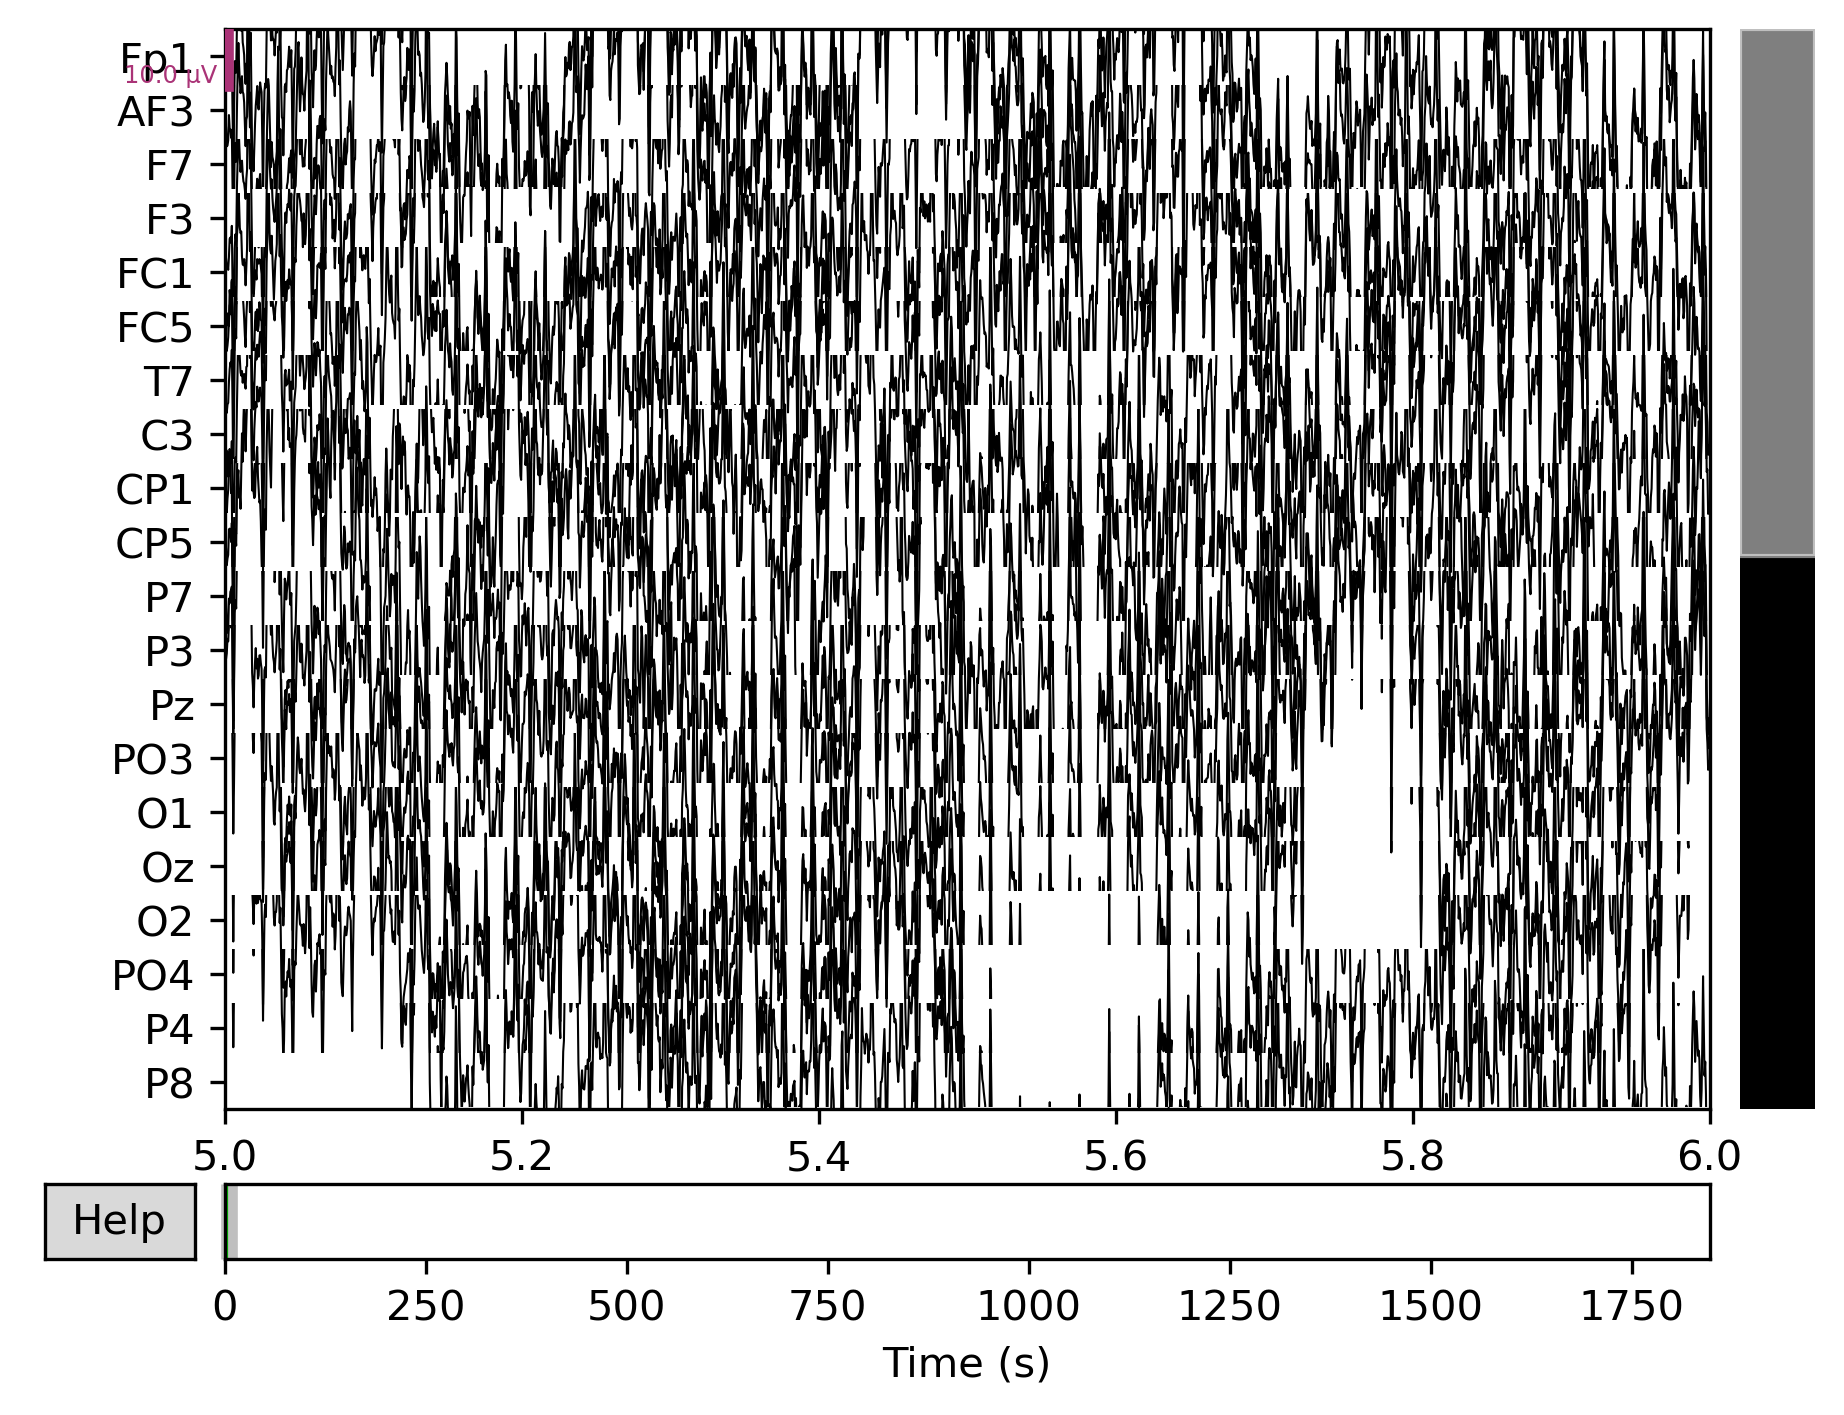

In [20]:
# note the interactive version of plot is a pop-up window
# let's see the events in events-12 color
%matplotlib qt
eeg_list[3].plot(events=Events_12[index], start=5, scalings=50e-7,
            duration=1, event_color=colorDict)

